# Install the ucimlrepo package

In [ ]:
!pip install ucimlrepo
!pip install scikit-optimize
!pip install shap

In [ ]:
import pandas as pd

import seaborn as sns

import numpy as np
from numpy import mean

from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap

from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

from sklearn.ensemble import IsolationForest, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer,  KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb

import shap

from ucimlrepo import fetch_ucirepo

# Import the dataset

In [ ]:
# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X_df = hepatitis.data.features
y_df = hepatitis.data.targets

# Data Analysis

## First 5 rows

In [ ]:
X_df.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


## Metadata

In [ ]:
# metadata
print(hepatitis.metadata)

{'uci_id': 46, 'name': 'Hepatitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis', 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv', 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 155, 'num_features': 19, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Q59J', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_descri

## Info about data attributes

In [ ]:
print(X_df.info())
print()
print(y_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  Alk Phosphate    126 non-null    float64
 15  Sgot             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

In [ ]:
print(hepatitis.variables)

               name     role         type demographic description units  \
0             Class   Target  Categorical        None        None  None   
1               Age  Feature      Integer        None        None  None   
2               Sex  Feature  Categorical        None        None  None   
3           Steroid  Feature  Categorical        None        None  None   
4        Antivirals  Feature  Categorical        None        None  None   
5           Fatigue  Feature  Categorical        None        None  None   
6           Malaise  Feature  Categorical        None        None  None   
7          Anorexia  Feature  Categorical        None        None  None   
8         Liver Big  Feature  Categorical        None        None  None   
9        Liver Firm  Feature  Categorical        None        None  None   
10  Spleen Palpable  Feature  Categorical        None        None  None   
11          Spiders  Feature  Categorical        None        None  None   
12          Ascites  Feat

## Plot attribute values

 
----------------------------------- Information about Age -----------------------------------

count    155.000000
mean      41.200000
std       12.565878
min        7.000000
25%       32.000000
50%       39.000000
75%       50.000000
max       78.000000



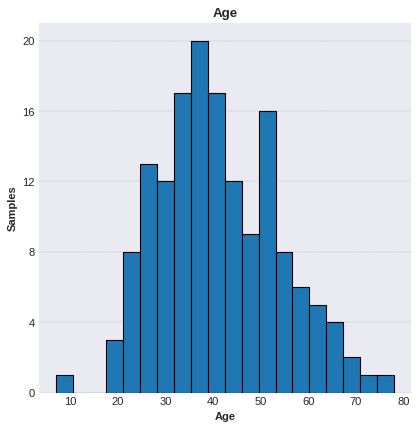

 
----------------------------------- Information about Sex -----------------------------------

count    155.000000
mean       1.103226
std        0.305240
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000



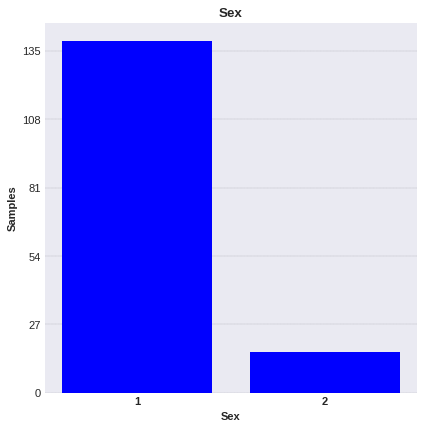

 
----------------------------------- Information about Steroid -----------------------------------

count    154.000000
mean       1.506494
std        0.501589
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000



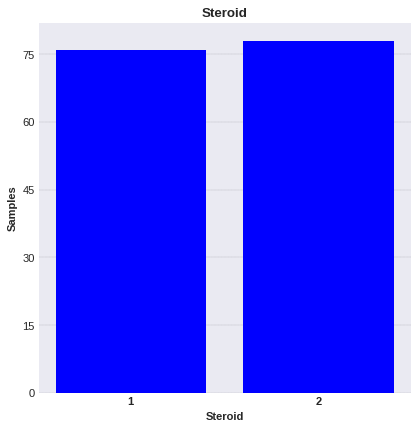

 
----------------------------------- Information about Antivirals -----------------------------------

count    155.000000
mean       1.845161
std        0.362923
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000



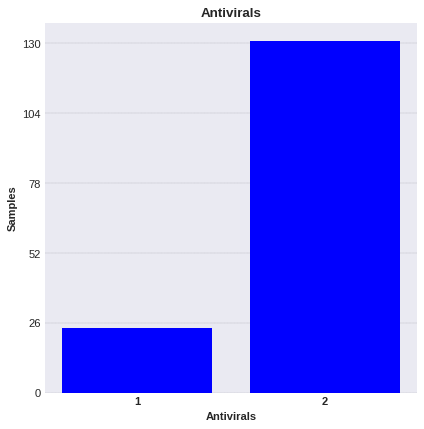

 
----------------------------------- Information about Fatigue -----------------------------------

count    154.000000
mean       1.350649
std        0.478730
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000



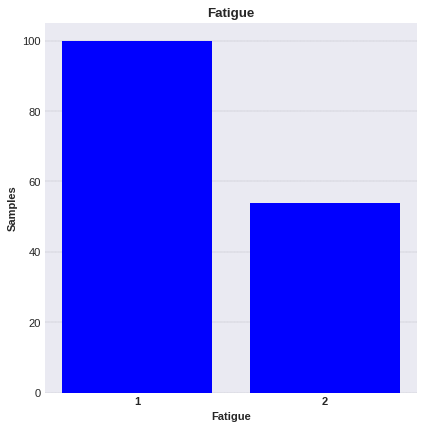

 
----------------------------------- Information about Malaise -----------------------------------

count    154.000000
mean       1.603896
std        0.490682
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000



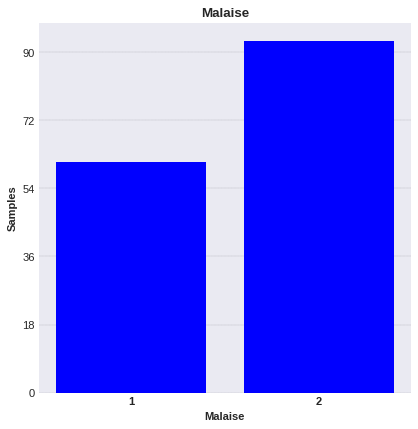

 
----------------------------------- Information about Anorexia -----------------------------------

count    154.000000
mean       1.792208
std        0.407051
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000



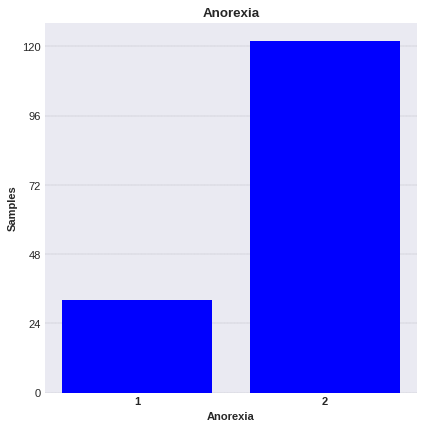

 
----------------------------------- Information about Liver Big -----------------------------------

count    145.000000
mean       1.827586
std        0.379049
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000



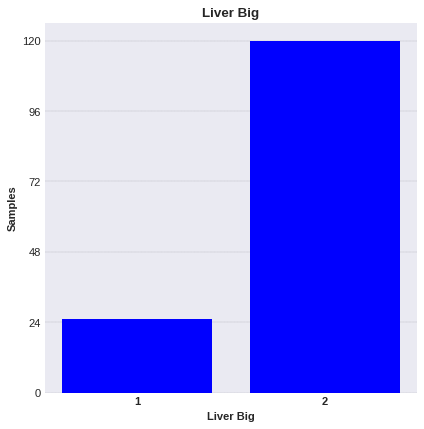

 
----------------------------------- Information about Liver Firm -----------------------------------

count    144.000000
mean       1.583333
std        0.494727
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000



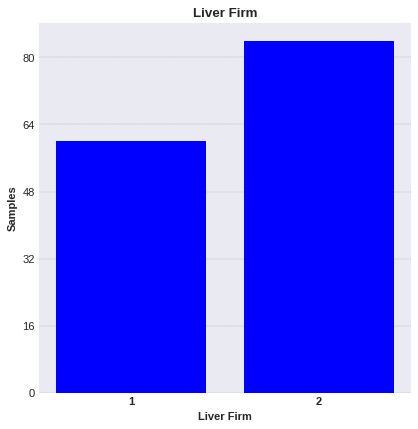

 
----------------------------------- Information about Spleen Palpable -----------------------------------

count    150.00000
mean       1.80000
std        0.40134
min        1.00000
25%        2.00000
50%        2.00000
75%        2.00000
max        2.00000



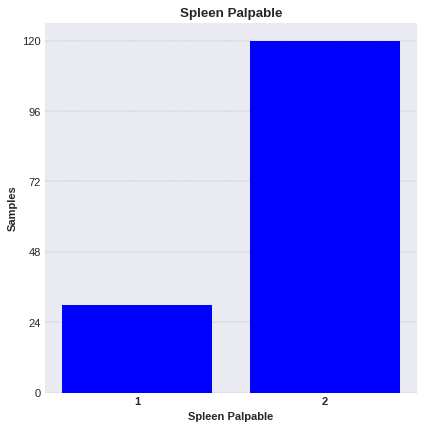

 
----------------------------------- Information about Spiders -----------------------------------

count    150.000000
mean       1.660000
std        0.475296
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000



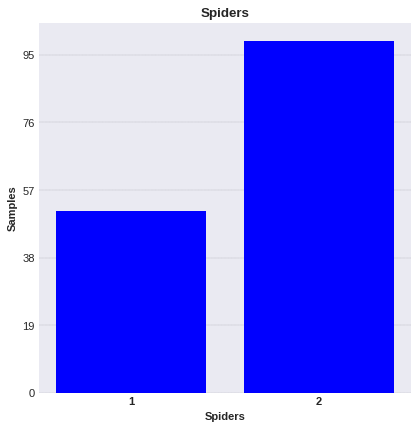

 
----------------------------------- Information about Ascites -----------------------------------

count    150.000000
mean       1.866667
std        0.341073
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000



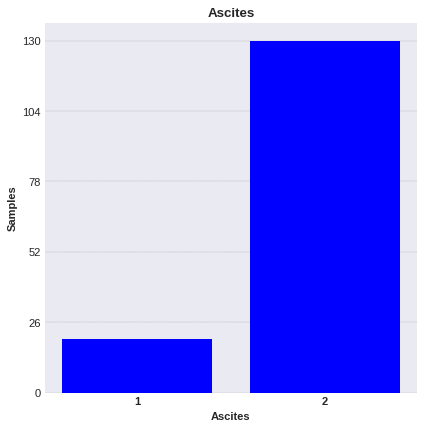

 
----------------------------------- Information about Varices -----------------------------------

count    150.00000
mean       1.88000
std        0.32605
min        1.00000
25%        2.00000
50%        2.00000
75%        2.00000
max        2.00000



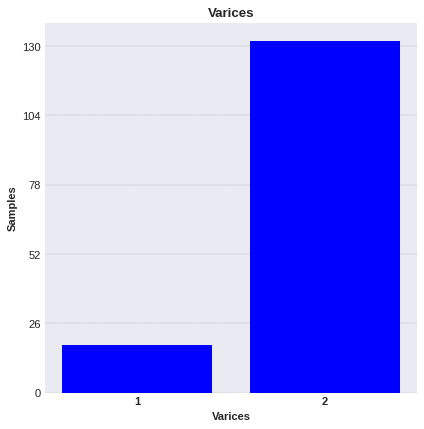

 
----------------------------------- Information about Bilirubin -----------------------------------

count    149.000000
mean       1.427517
std        1.212149
min        0.300000
25%        0.700000
50%        1.000000
75%        1.500000
max        8.000000



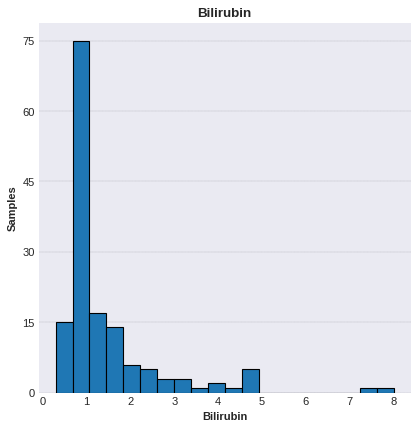

 
----------------------------------- Information about Alk Phosphate -----------------------------------

count    126.000000
mean     105.325397
std       51.508109
min       26.000000
25%       74.250000
50%       85.000000
75%      132.250000
max      295.000000



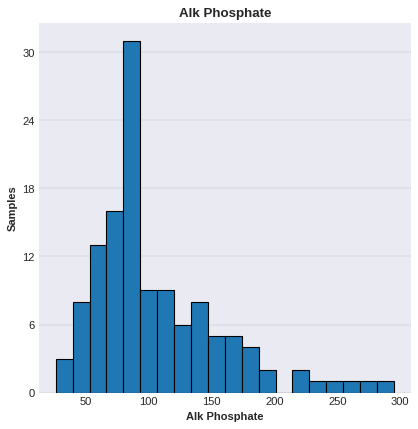

 
----------------------------------- Information about Sgot -----------------------------------

count    151.00000
mean      85.89404
std       89.65089
min       14.00000
25%       31.50000
50%       58.00000
75%      100.50000
max      648.00000



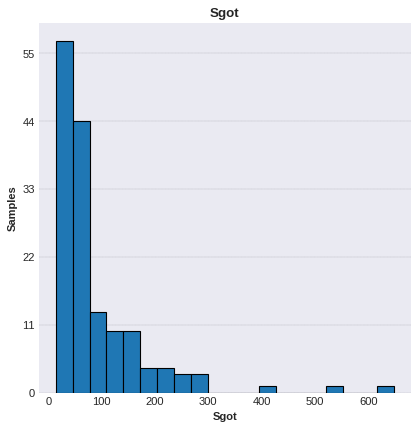

 
----------------------------------- Information about Albumin -----------------------------------

count    139.000000
mean       3.817266
std        0.651523
min        2.100000
25%        3.400000
50%        4.000000
75%        4.200000
max        6.400000



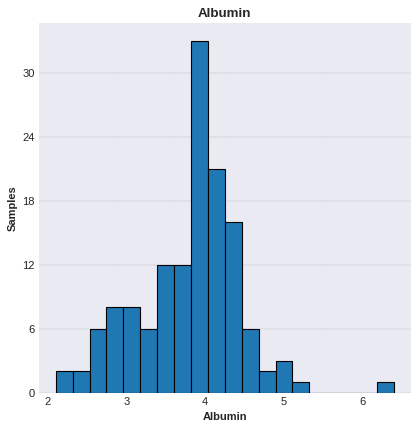

 
----------------------------------- Information about Protime -----------------------------------

count     88.000000
mean      61.852273
std       22.875244
min        0.000000
25%       46.000000
50%       61.000000
75%       76.250000
max      100.000000



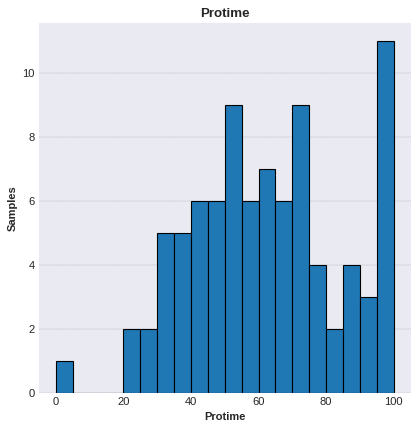

 
----------------------------------- Information about Histology -----------------------------------

count    155.000000
mean       1.451613
std        0.499266
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000



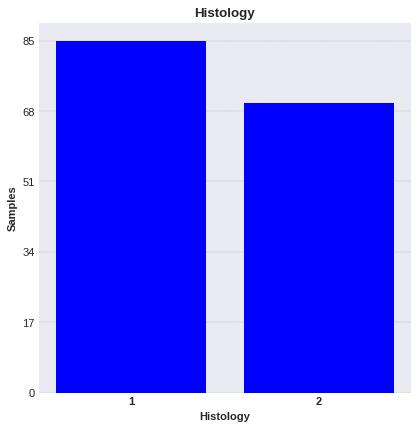

In [ ]:
plt.style.use("seaborn-v0_8-dark")
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi']= 80
plt.rcParams["legend.fancybox"] = True

for column in X_df.columns:
    print(" \n----------------------------------- Information about {} -----------------------------------\n".format(column))
    print(X_df[column].describe().to_string())
    print()

    plt.figure(figsize=(6, 6))
    plt.title(column, fontweight='bold')
    plt.xlabel(column, fontweight='bold')
    plt.ylabel('Samples', fontweight='bold')

    unique_values = X_df[column].nunique()

    if unique_values == 2:
        value_counts = X_df[column].value_counts()
        plt.bar(value_counts.index, value_counts.values, color='blue')
        plt.xticks(value_counts.index, fontweight='bold')
        max_samples = value_counts.max()
    else:
        max_samples = plt.hist(X_df[column], bins=20, edgecolor='black')[0].max()


    step_size = max_samples / 5
    plt.yticks(range(0, int(max_samples) + 1, int(step_size)))

    plt.grid(axis='y', color='black', linestyle='--', linewidth=0.1)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()


## Check for duplicates

In [ ]:
print("Num of duplicate rows: ", X_df.duplicated().sum())

Num of duplicate rows:  0


## Check for missing values for each attribute

In [ ]:
print("Missing Values for each attribute\n")
print(X_df.isnull().sum().to_string())

Missing Values for each attribute

Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0


## Pie charts for missing values

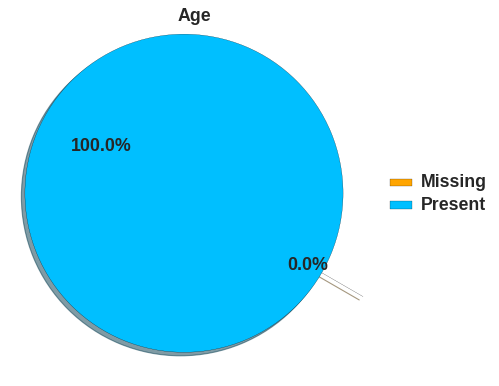

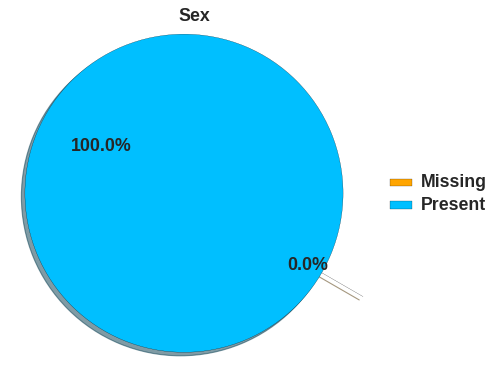

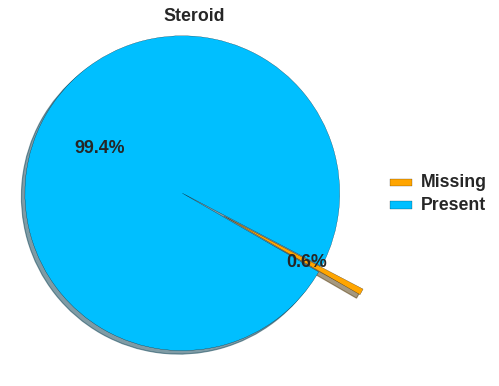

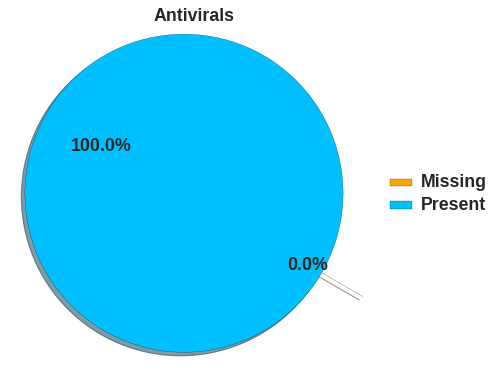

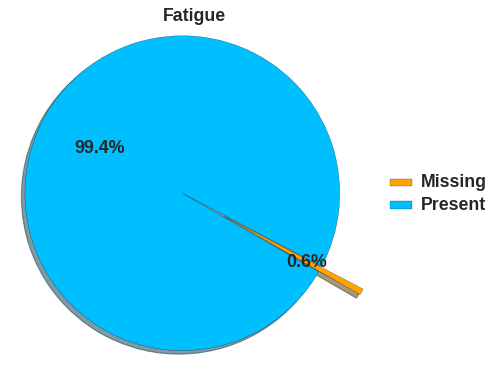

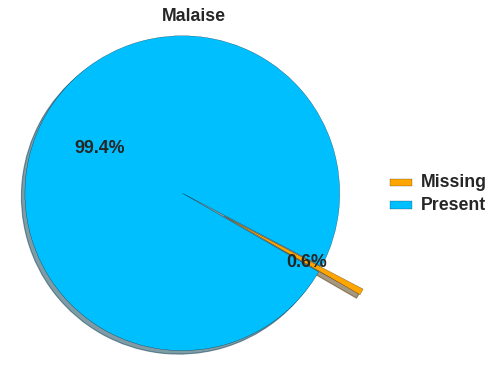

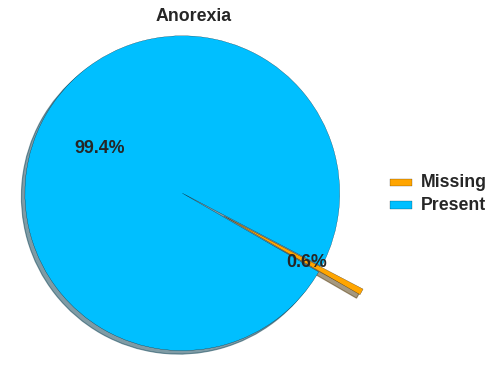

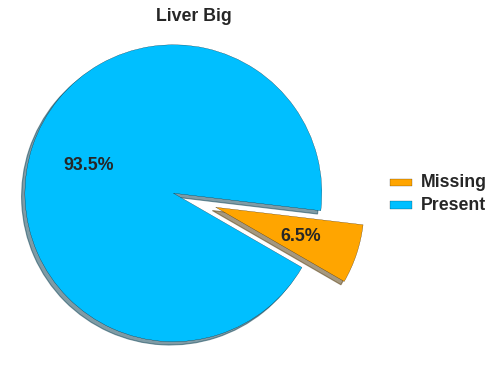

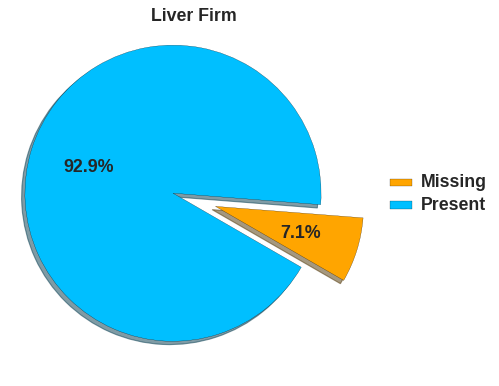

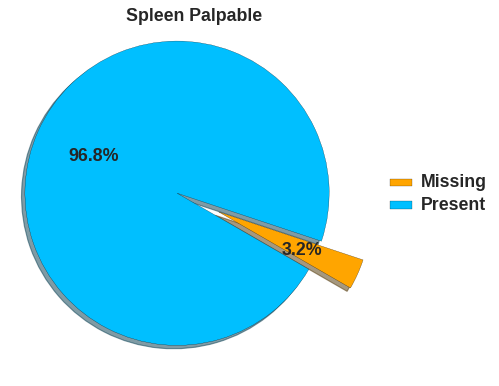

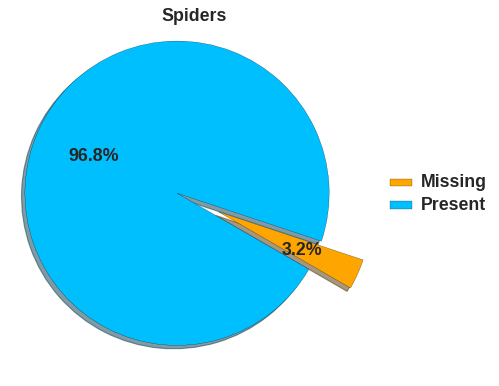

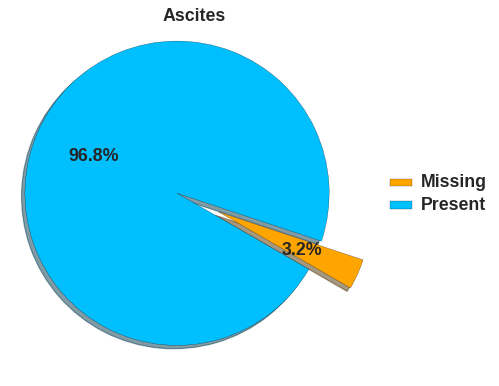

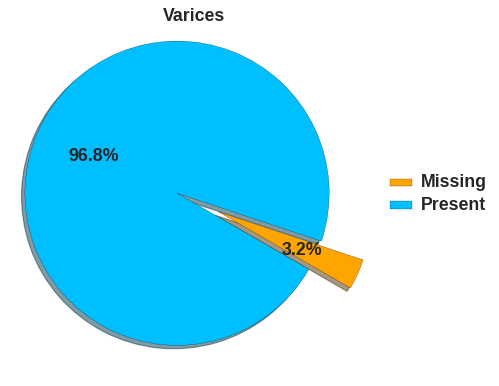

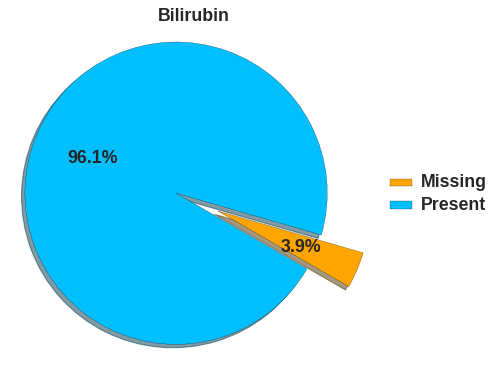

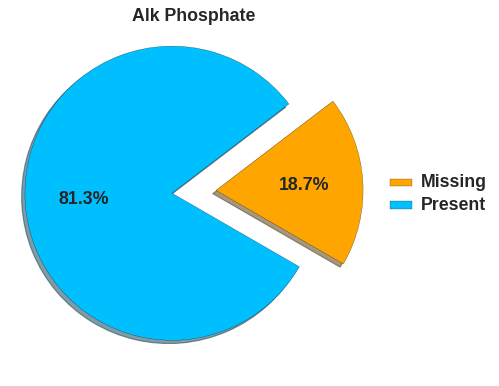

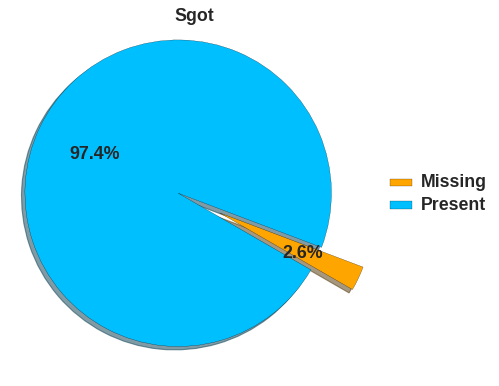

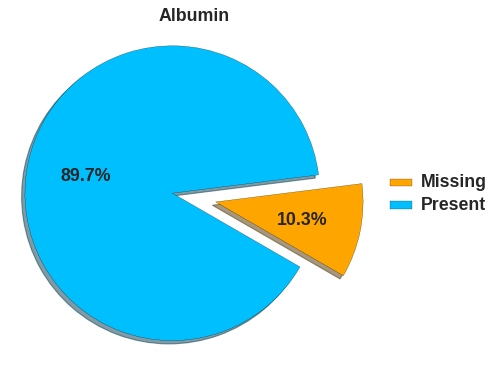

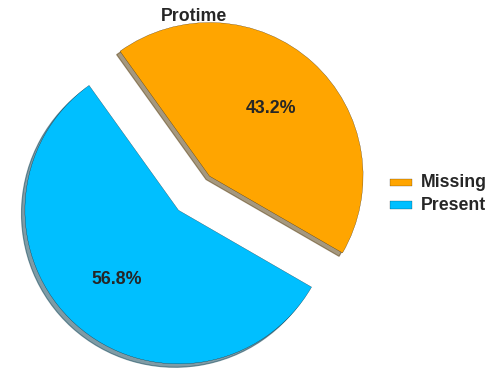

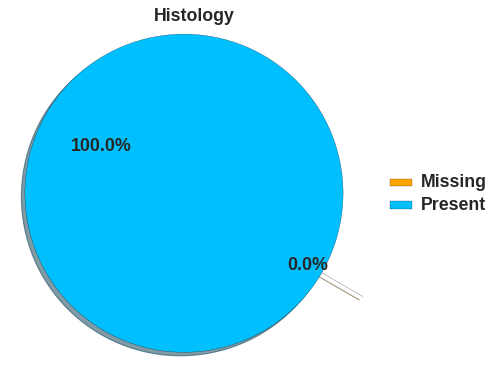

In [ ]:
missing_percentage = (X_df.isnull().sum() / len(X_df)) * 100

colors = ['orange', 'deepskyblue']

for column in X_df.columns:
    fig, ax = plt.subplots(figsize=(6,6))
    wedges, _, autopcts = ax.pie([len(X_df) - X_df[column].count(), X_df[column].count()], labels=None,
                                  autopct='%1.1f%%', startangle=330, colors=colors, explode=(0.3, 0), shadow=True, labeldistance=.4,
                                  textprops={'fontsize': 16, 'fontweight': 'bold'})  # Set text properties for labels

    for wedge in wedges:
        wedge.set_edgecolor('black')
        wedge.set_linewidth(0.2)

    ax.set_title(f"{column}", fontsize=16, fontweight='bold', y=0.95)
    plt.axis('equal')

    legend_labels = ['Missing', 'Present']
    legend = plt.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    frame = legend.get_frame()
    frame.set_edgecolor('black')
    frame.set_linewidth(1)
    for text in legend.get_texts():
        text.set_fontweight('bold')
        text.set_fontsize(16)

    #plt.savefig(f"{column}_missing_values_pie_chart.png", bbox_inches='tight')
    plt.show()


## Class frequencies chart

Class
2    123
1     32
Name: count, dtype: int64


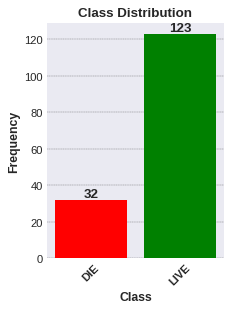

In [ ]:
class_counts = y_df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(3, 4))
bars = plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Class Distribution',fontweight='bold')
plt.xlabel('Class',fontweight='bold', fontsize=11)
plt.ylabel('Frequency',fontweight='bold', fontsize=11)
plt.xticks(class_counts.index, ['LIVE', 'DIE'],rotation=45,fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black', linewidth=0.3)
plt.tight_layout()
plt.show()

## Missing Value Imputation

## Scaling

In [ ]:
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

X_df = pd.DataFrame(scaler.fit_transform(X_df.values), columns = X_df.columns)

In [ ]:
def impute_nan_values(X_df, imputation_strategy = "mean"):
  for column in X_df.columns:
    # unique_values = X_df[column].nunique()
    # if unique_values == 2: continue
    # else:
    if X_df[column].isnull().any():
        if imputation_strategy == "mean":
          imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        elif imputation_strategy == "median":
          imputer = SimpleImputer(missing_values=np.nan, strategy='median')
        elif imputation_strategy == "knn":
          imputer = KNNImputer(missing_values=np.nan, n_neighbors=10)
        X_df[column] = imputer.fit_transform(X_df[[column]])
  return X_df

In [ ]:
X_df = impute_nan_values(X_df, imputation_strategy = "knn")

In [ ]:
print("Missing Values for each attribute after imputation\n")
print(X_df.isnull().sum().to_string())

Missing Values for each attribute after imputation

Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0


## Check for outliers


### Z-score

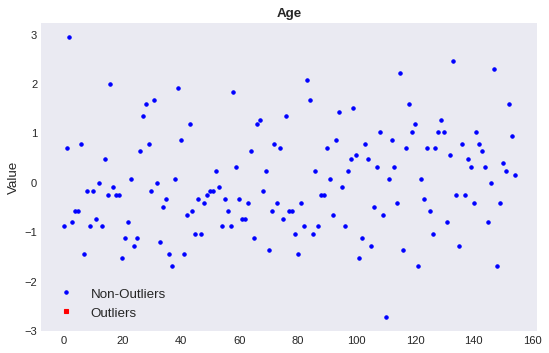

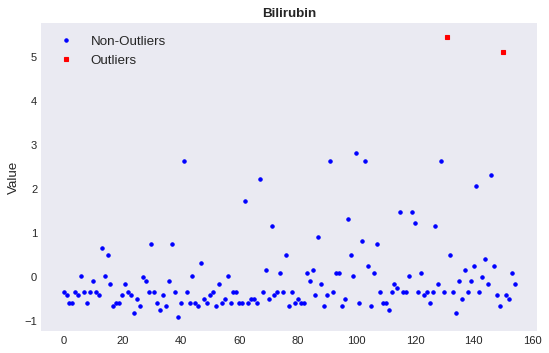

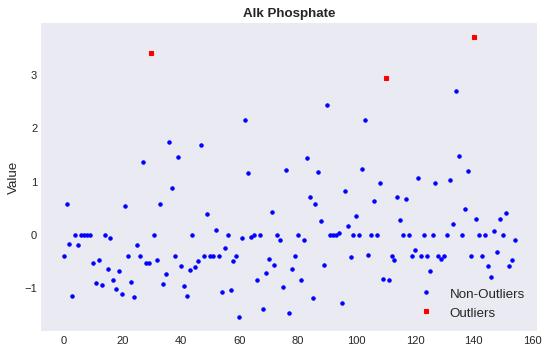

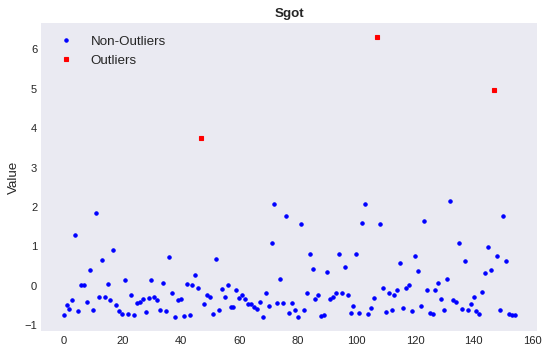

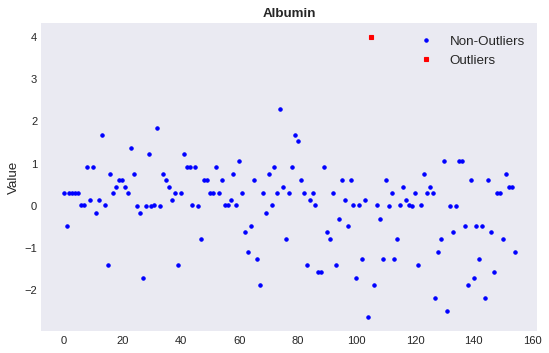

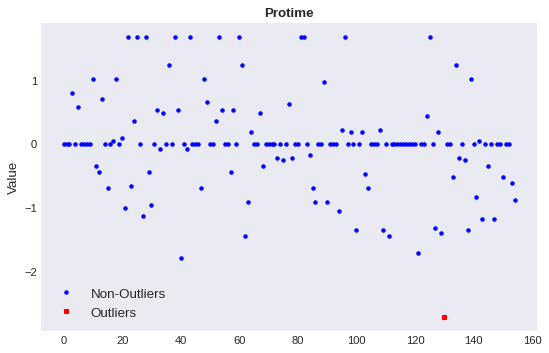

In [ ]:
zscore_threshold = 3

for i, attr in enumerate(['Age','Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']):
    unique_values = X_df[attr].nunique()
    if unique_values > 2:
        plt.figure(figsize=(8, 5))
        plt.plot(X_df[attr].values, color='blue', linestyle='None', marker='o', markersize=3, label='Non-Outliers')
        plt.title(attr, fontsize=12, fontweight='bold')
        plt.ylabel('Value', fontsize=12)

        outliers = np.where(np.abs(stats.zscore(X_df[attr])) > zscore_threshold)[0]
        plt.plot(outliers, X_df[attr].values[outliers], color='red', linestyle='None', marker='s', markersize=4, label='Outliers')

        plt.legend(loc='best', fontsize=12)
        #plt.savefig(f'{i}.png'.format(i), bbox_inches='tight')


### Box Plots - IQR

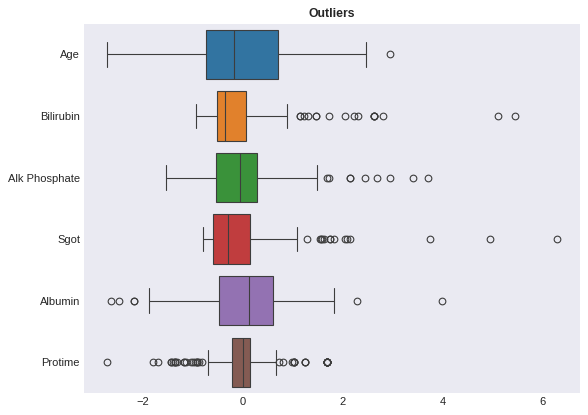

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_df[['Age','Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']],orient='h')
plt.title("Outliers", fontweight='bold', fontsize=11)
#plt.savefig(f'box_plot.png', bbox_inches='tight')
plt.show()

In [ ]:
for i, attr in enumerate(['Age','Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']):
  Q1 = X_df[attr].quantile(0.25)
  Q3 = X_df[attr].quantile(0.75)
  IQR = Q3 - Q1
  filter = (X_df[attr] >= Q1 - 1.5 * IQR) & (X_df[attr] <= Q3 + 1.5 *IQR)
  X_df_filtered = X_df.loc[filter]   # AM: changed the df name, so that the default name is unfiltered
  y_df_filtered = y_df.loc[filter]

### Isolation Forest

In [ ]:
# Convert dataset to numpy array
X = X_df.to_numpy()
y = y_df.to_numpy()

print("Dataset shape before outlier removal",X.shape)

clf = IsolationForest(n_estimators=100, max_samples='auto',verbose=0, random_state=10, contamination=0.01)
preds = clf.fit_predict(X,y)
X_iso_filtered = X[preds==1]
y_iso_filtered = y[preds==1]

print("Dataset shape after outlier removal",X.shape)

Dataset shape before outlier removal (155, 19)
Dataset shape after outlier removal (155, 19)


## Pairwise Correlation Matrix

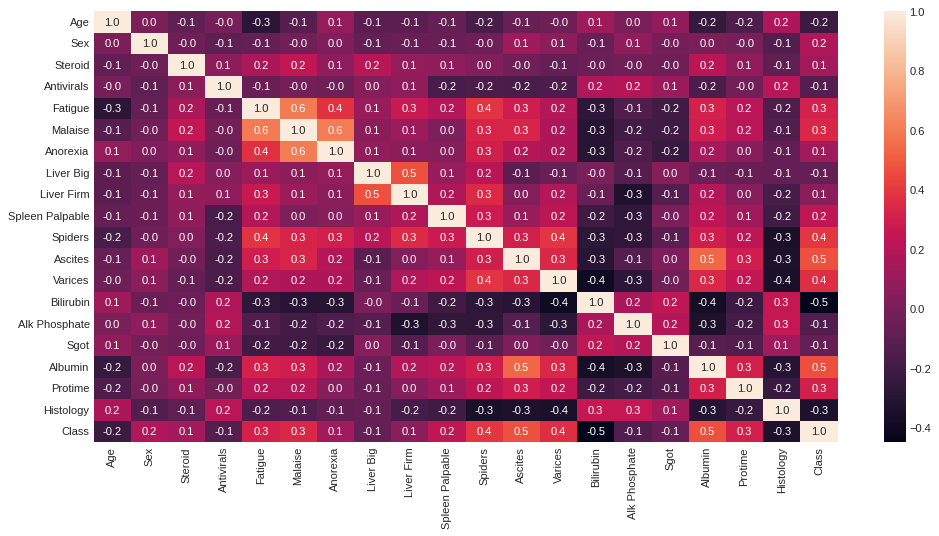


[]
0 features to drop


In [ ]:
df = pd.concat([X_df, y_df], axis=1)
cor_matrix = df.corr()
plt.figure(figsize =(15, 7))
dataplot=sns.heatmap(cor_matrix,annot=True, fmt=".1f")
# plt.savefig("corr_matrix.png",bbox_inches='tight')
plt.show()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

corr_threshold = 0.6
for i,column in enumerate(upper_tri.columns):
  high_correlations = np.where(upper_tri[column] > corr_threshold)[0]
  if high_correlations.any():
    for attr in high_correlations:
      print("The attribute pair {} has a correlation score {}".format((column,X_df.columns[attr]),upper_tri.values[attr][i]))

col_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)]
print()
print(col_to_drop)
print("{} features to drop".format(len(col_to_drop)))

# Train-val splits

In [ ]:
# Convert dataset to numpy array
X = X_df.to_numpy()
y = y_df.to_numpy().ravel()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
X_train_red, X_val_red, y_train_red, y_val_red = train_test_split(X_df[["Albumin", "Alk Phosphate", "Bilirubin", "Spiders", "Age", "Sgot"]].to_numpy(), y, test_size=0.2, random_state=10)
if (min(y_train) != 0):
  y_train -= 1
  y_val -= 1
  y_train_red -= 1
  y_val_red -= 1

print("Overall dataset size :", X.shape)
print("Train dataset size :", X_train.shape)
print("Val dataset size :", X_val.shape)

Overall dataset size : (155, 19)
Train dataset size : (124, 19)
Val dataset size : (31, 19)


# Logistic Regression (Baseline)

## Logistic Lasso Regression

### Different values of hyperparameter C

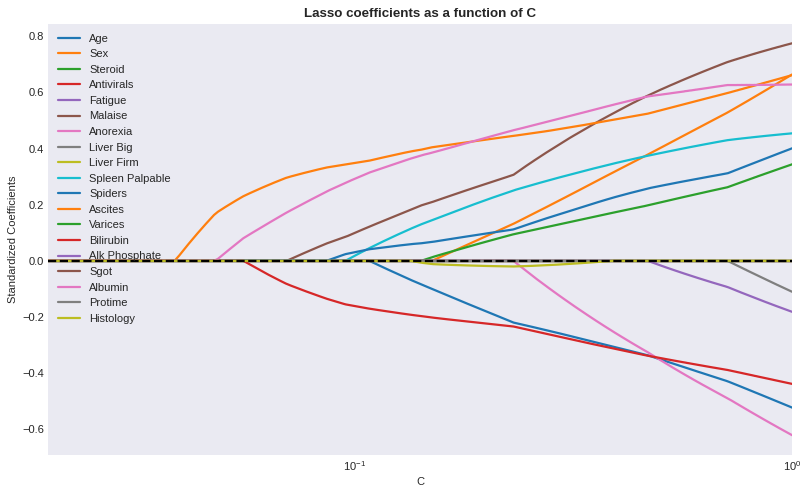

In [ ]:
C_list = np.linspace(0.005,1,1000)
lasso = LogisticRegression(penalty='l1',solver='liblinear')
coefs = []

for C_ in C_list:
    lasso.set_params(C=C_)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_[0])

ax = plt.figure(figsize=(12,7))
ax = plt.gca()
ax.plot(C_list, coefs, label=X_df.columns)
ax.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc='best')
plt.axis('tight')
plt.xlabel('C')
plt.xlim([0.02,1])
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of C', fontweight='bold');
#plt.savefig("Lasso_C_coeff.png",bbox_inches='tight')

### Hyperparameter C selection

In [ ]:
search_spaces = {'C': Real(0.005,0.1)}
model = LogisticRegression(penalty='l1',solver='liblinear')

opt = BayesSearchCV(estimator=model,
                    search_spaces=search_spaces,
                    scoring='accuracy',
                    cv=5,
                    n_iter=100,
                    n_jobs=1,
                    random_state=15,
                    verbose=10)

opt.fit(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=0.09304498569604745.......................................
[CV 1/5; 1/1] END ........C=0.09304498569604745;, score=0.806 total time=   0.0s
[CV 2/5; 1/1] START C=0.09304498569604745.......................................
[CV 2/5; 1/1] END ........C=0.09304498569604745;, score=0.871 total time=   0.0s
[CV 3/5; 1/1] START C=0.09304498569604745.......................................
[CV 3/5; 1/1] END ........C=0.09304498569604745;, score=0.839 total time=   0.0s
[CV 4/5; 1/1] START C=0.09304498569604745.......................................
[CV 4/5; 1/1] END ........C=0.09304498569604745;, score=0.871 total time=   0.0s
[CV 5/5; 1/1] START C=0.09304498569604745.......................................
[CV 5/5; 1/1] END ........C=0.09304498569604745;, score=0.677 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=0.05358449500751779...............................

BayesSearchCV(cv=5,
              estimator=LogisticRegression(penalty='l1', solver='liblinear'),
              n_iter=100, random_state=15, scoring='accuracy',
              search_spaces={'C': Real(low=0.005, high=0.1, prior='uniform', transform='normalize')},
              verbose=10)

In [ ]:
print("Best parameters: ", opt.best_params_)
print("Best CV score: ",opt.best_score_)

Best parameters:  OrderedDict([('C', 0.06263751975175012)])
Best CV score:  0.8258064516129032


### Fit best model

In [ ]:
best_C = opt.best_params_['C']
best_model = LogisticRegression(C = best_C, penalty='l1',solver='liblinear')
best_model.fit(X_train,y_train)
predictions = best_model.predict(X_val)
print(classification_report(y_val, predictions))
#plt.figure()
#plt.show()

auc = roc_auc_score(y_val, predictions)
bal_acc = balanced_accuracy_score(y_val, predictions)
print(f"AUC: {auc}")
print(f"Balanced Accuracy: {bal_acc}")


              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.81      0.92      0.86        24

    accuracy                           0.77        31
   macro avg       0.66      0.60      0.61        31
weighted avg       0.74      0.77      0.75        31

AUC: 0.6011904761904762
Balanced Accuracy: 0.6011904761904762


### Lasso Coefficients

Lasso coefficients

Age                0.000000
Sex                0.000000
Steroid            0.000000
Antivirals         0.000000
Fatigue            0.000000
Malaise            0.000000
Anorexia           0.000000
Liver Big          0.000000
Liver Firm         0.000000
Spleen Palpable    0.000000
Spiders            0.000000
Ascites            0.265420
Varices            0.000000
Bilirubin         -0.043657
Alk Phosphate      0.000000
Sgot               0.000000
Albumin            0.127619
Protime            0.000000
Histology          0.000000


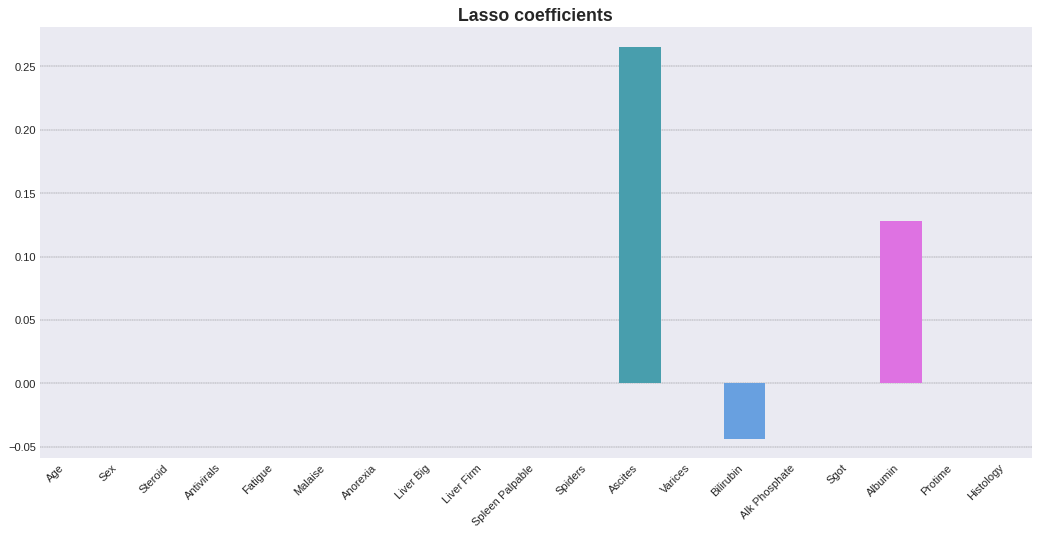

In [ ]:
print("Lasso coefficients\n")
coefficients = pd.Series(best_model.coef_[0], index=X_df.columns)
print(coefficients.to_string())
plt.figure(figsize=(16, 7))
sns.barplot(x=X_df.columns, y=best_model.coef_[0], hue=X_df.columns, palette=sns.color_palette('husl', len(X_df.columns)), legend=False)
plt.title("Lasso coefficients", fontweight='bold',fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel(None)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black', linewidth=0.3)

#plt.savefig("Lasso_coeff_bars.png",bbox_inches='tight')
plt.show()

### Zero Lasso Coefficients

In [ ]:
zero_coeff = []

for column, coeff in coefficients.items():
    if coeff == 0:
        zero_coeff.append(column)

print(zero_coeff)

['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Varices', 'Alk Phosphate', 'Sgot', 'Protime', 'Histology']


### Drop attributes with zero Lasso coefficient

In [ ]:
X_few_attr_df = X_df.drop(columns=zero_coeff)
X_few_attr = X_few_attr_df.to_numpy()
X_few_attr_train, X_few_attr_val, y_few_attr_train, y_few_attr_val = train_test_split(X_few_attr, y, test_size=0.2, random_state=10)

## Logistic Regression with L2 regularization

### Hyperparameter C selection

In [ ]:
search_spaces = {'C': Real(0.005, 1)}
model = LogisticRegression()

opt = BayesSearchCV(estimator=model,
                    search_spaces=search_spaces,
                    scoring='accuracy',
                    cv=5,
                    n_iter=50,
                    n_jobs=1,
                    random_state=10,
                    verbose=10)

opt.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=0.05327454442927515.......................................
[CV 1/5; 1/1] END ........C=0.05327454442927515;, score=0.760 total time=   0.0s
[CV 2/5; 1/1] START C=0.05327454442927515.......................................
[CV 2/5; 1/1] END ........C=0.05327454442927515;, score=0.840 total time=   0.0s
[CV 3/5; 1/1] START C=0.05327454442927515.......................................
[CV 3/5; 1/1] END ........C=0.05327454442927515;, score=0.800 total time=   0.0s
[CV 4/5; 1/1] START C=0.05327454442927515.......................................
[CV 4/5; 1/1] END ........C=0.05327454442927515;, score=0.880 total time=   0.0s
[CV 5/5; 1/1] START C=0.05327454442927515.......................................
[CV 5/5; 1/1] END ........C=0.05327454442927515;, score=0.917 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=0.9915341884566957................................

BayesSearchCV(cv=5, estimator=LogisticRegression(), random_state=10,
              scoring='accuracy',
              search_spaces={'C': Real(low=0.005, high=1, prior='uniform', transform='normalize')},
              verbose=10)

In [ ]:
print("Best parameters: ", opt.best_params_)
print("Best CV score: ",opt.best_score_)

Best parameters:  OrderedDict([('C', 0.3215430922177769)])
Best CV score:  0.8550000000000001


### Fit best Logistic Regression with L2 regularization

In [ ]:
best_C = opt.best_params_['C']
best_model = LogisticRegression(C = best_C)
best_model.fit(X_train,y_train)
predictions = best_model.predict(X_val)
print(classification_report(y_val, predictions))
plt.figure()
plt.show()

auc = roc_auc_score(y_val, predictions)
bal_acc = balanced_accuracy_score(y_val, predictions)
print(f"AUC: {auc}")
print(f"Balanced Accuracy: {bal_acc}")

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.92      0.92      0.92        24

    accuracy                           0.87        31
   macro avg       0.82      0.82      0.82        31
weighted avg       0.87      0.87      0.87        31



<Figure size 512x384 with 0 Axes>

AUC: 0.8154761904761905
Balanced Accuracy: 0.8154761904761905


### Logistic Regression with L2 regularization on fewer attributes

### Bayesian search

In [ ]:
search_spaces = {'C': Real(0.005, 1)}
model = LogisticRegression()

opt = BayesSearchCV(estimator=model,
                    search_spaces=search_spaces,
                    scoring='accuracy',
                    cv=5,
                    n_iter=10,
                    n_jobs=1,
                    random_state=10,
                    verbose=10)


opt.fit(X_few_attr_train, y_few_attr_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=0.05327454442927515.......................................
[CV 1/5; 1/1] END ........C=0.05327454442927515;, score=0.920 total time=   0.0s
[CV 2/5; 1/1] START C=0.05327454442927515.......................................
[CV 2/5; 1/1] END ........C=0.05327454442927515;, score=0.840 total time=   0.0s
[CV 3/5; 1/1] START C=0.05327454442927515.......................................
[CV 3/5; 1/1] END ........C=0.05327454442927515;, score=0.800 total time=   0.0s
[CV 4/5; 1/1] START C=0.05327454442927515.......................................
[CV 4/5; 1/1] END ........C=0.05327454442927515;, score=0.880 total time=   0.0s
[CV 5/5; 1/1] START C=0.05327454442927515.......................................
[CV 5/5; 1/1] END ........C=0.05327454442927515;, score=0.917 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=0.9915341884566957................................

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_iter=10, random_state=10,
              scoring='accuracy',
              search_spaces={'C': Real(low=0.005, high=1, prior='uniform', transform='normalize')},
              verbose=10)

In [ ]:
print("Best parameters: ", opt.best_params_)
print("Best CV score: ",opt.best_score_)

Best parameters:  OrderedDict([('C', 0.3215430922177769)])
Best CV score:  0.8873333333333333


### Fit best model

In [ ]:
best_C = opt.best_params_['C']
best_model = LogisticRegression(C = best_C)
best_model.fit(X_few_attr_train,y_few_attr_train)
predictions = best_model.predict(X_few_attr_val)
print(classification_report(y_few_attr_val, predictions))
auc = roc_auc_score(y_few_attr_val, predictions)
bal_acc = balanced_accuracy_score(y_few_attr_val, predictions)
print(f"AUC: {auc}")
print(f"Balanced Accuracy: {bal_acc}")
plt.figure()
plt.show()

              precision    recall  f1-score   support

           1       0.60      0.43      0.50         7
           2       0.85      0.92      0.88        24

    accuracy                           0.81        31
   macro avg       0.72      0.67      0.69        31
weighted avg       0.79      0.81      0.79        31

AUC: 0.6726190476190476
Balanced Accuracy: 0.6726190476190476


<Figure size 512x384 with 0 Axes>

# Feature Importances

In [ ]:
def feature_importances(model, name='Decision Tree'):
  model.fit(X, y)
  sorted_idx = model.feature_importances_.argsort()
  plt.figure(figsize=(11,7))
  plt.barh(X_df.columns[sorted_idx], model.feature_importances_[sorted_idx],color='blue')
  plt.title(f"{name} Feature Importances", fontweight='bold',fontsize=16)
  plt.grid(axis='x', linestyle='--', alpha=0.7, color='black', linewidth=0.3)
  #plt.savefig(f"{name}.png",bbox_inches='tight')
  plt.show()

  print(classification_report(y_val, np.round(model.predict(X_val))))
  return

### Decision Tree

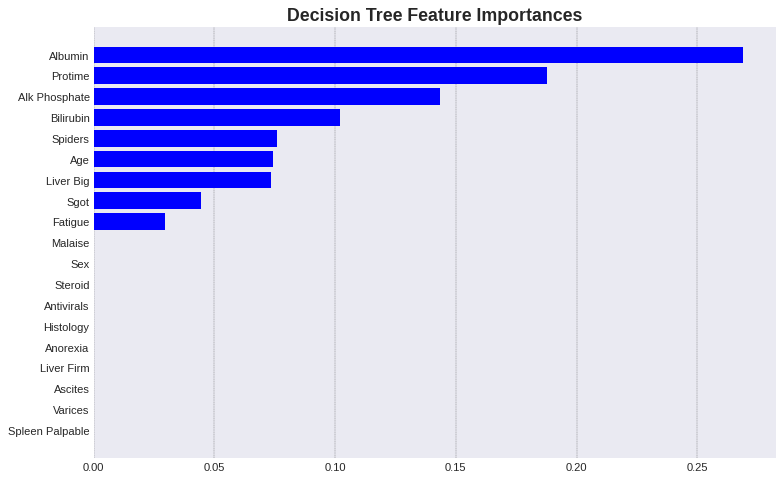

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       7.0
           1       0.00      0.00      0.00      24.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00      31.0
   macro avg       0.00      0.00      0.00      31.0
weighted avg       0.00      0.00      0.00      31.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
feature_importances(DecisionTreeClassifier(criterion = 'gini',  max_features =None,random_state=10),"Decision Tree")

### Random Forest

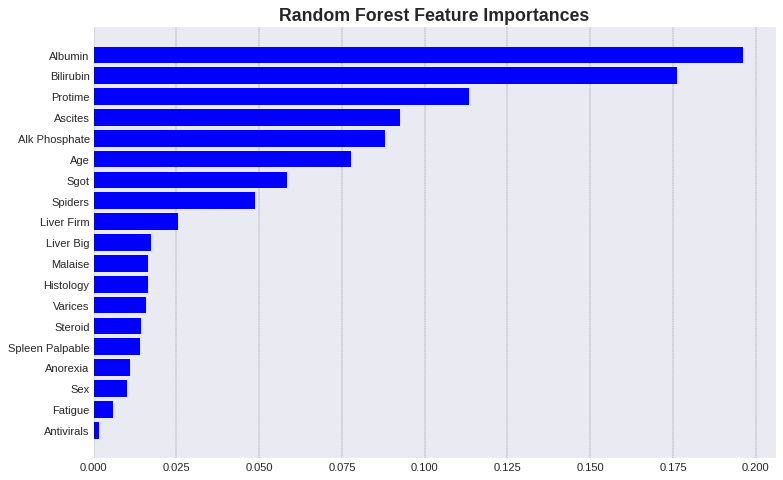

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       7.0
           1       0.00      0.00      0.00      24.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00      31.0
   macro avg       0.00      0.00      0.00      31.0
weighted avg       0.00      0.00      0.00      31.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
feature_importances(RandomForestClassifier(n_estimators=100, criterion = 'gini',  max_features =None,random_state=10),"Random Forest")

### Extra Trees

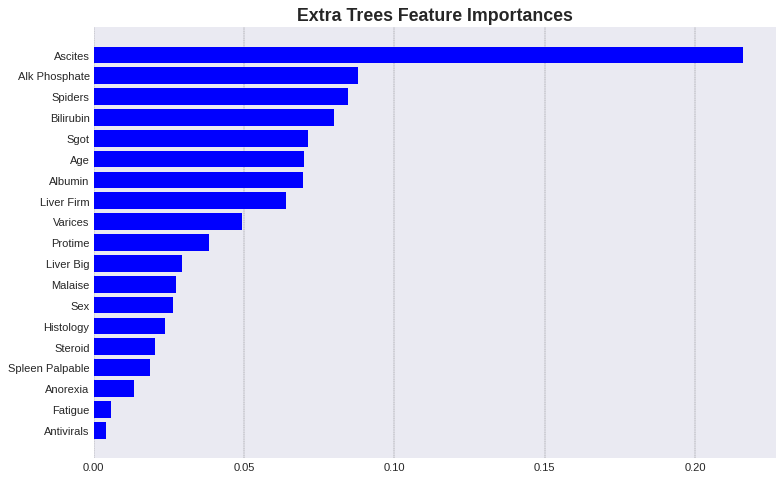

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       7.0
           1       0.00      0.00      0.00      24.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00      31.0
   macro avg       0.00      0.00      0.00      31.0
weighted avg       0.00      0.00      0.00      31.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
feature_importances(ExtraTreesClassifier(n_estimators=100, criterion = 'gini',  max_features =None,random_state=10),"Extra Trees")

# MLP

In [ ]:
mlp = MLPClassifier(random_state=20, hidden_layer_sizes =(64,32),alpha = 0.1, max_iter=50)
mlp.fit(X_train, y_train)
val_predictions = mlp.predict(X_val)
print(classification_report(y_val, val_predictions))
plt.figure()
plt.show()

auc = roc_auc_score(y_val, val_predictions)
bal_acc = balanced_accuracy_score(y_val, val_predictions)
print(f"AUC: {auc}")
print(f"Balanced Accuracy: {bal_acc}")

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.88      0.92      0.90        24

    accuracy                           0.84        31
   macro avg       0.77      0.74      0.76        31
weighted avg       0.83      0.84      0.83        31



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 512x384 with 0 Axes>

AUC: 0.744047619047619
Balanced Accuracy: 0.7440476190476191


# Explainability

## SHAP Values

In [ ]:
explainer = shap.KernelExplainer(mlp.predict,X_val)
shap_values = explainer.shap_values(X_val,nsamples=100)

  0%|          | 0/31 [00:00<?, ?it/s]

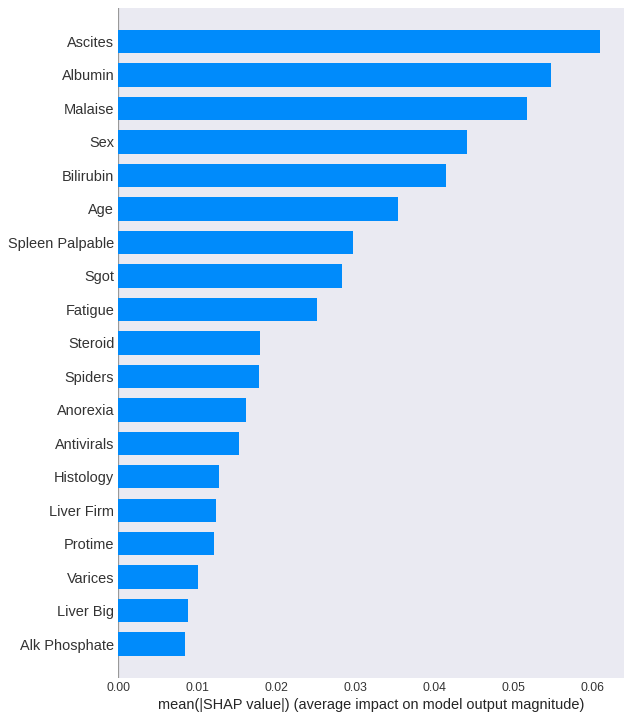

In [ ]:
shap.summary_plot(shap_values, X_val, plot_type="bar",feature_names=X_df.columns, title="SHAP Summary Plot")

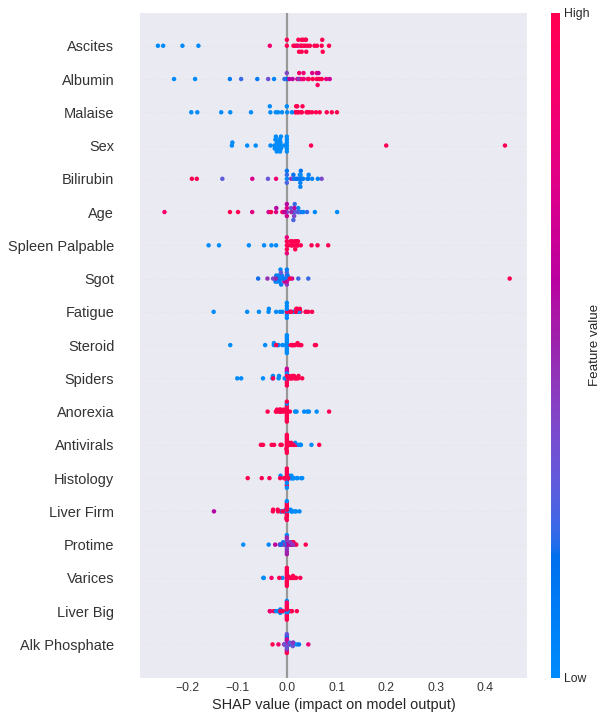

In [ ]:
shap.summary_plot(shap_values,X_val,feature_names=X_df.columns)

In [ ]:
# Testing boosting bagging etc.
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_val)
balanced_accuracy_score(y_val, y_pred)

0.7321428571428572

In [ ]:
bbc = BalancedBaggingClassifier(DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_val)
balanced_accuracy_score(y_val, y_pred)

0.7113095238095238

In [ ]:
brf = BalancedRandomForestClassifier(
    n_estimators=100, random_state=0, sampling_strategy="all", replacement=True,
    bootstrap=False,
)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_val)
balanced_accuracy_score(y_val, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

0.7946428571428572

In [ ]:
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
rusboost.fit(X_train, y_train)
y_pred = rusboost.predict(X_val)
balanced_accuracy_score(y_val, y_pred)

0.7232142857142857

In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost"
]

models = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    xgb.XGBClassifier(scale_pos_weight=7/31.)
]

over = SMOTE()  # sampling_strategy=0.1)
under = RandomUnderSampler()  # sampling_strategy=0.5)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# TODO: Find out how the scoring is done, on SMOTE data? On test / training (it's cv) etc.

for name, model in zip(names, models):
  steps = [('over', over), ('under', under), ('model', model)]
  pipeline = Pipeline(steps=steps)

  # instead of using multiple separate here, just use cross_validate instead, need to extract results then
  #scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  scores = cross_val_score(pipeline, X_train_red, y_train_red, scoring='f1', cv=cv, n_jobs=-1)
  print(name)
  print('roc_auc: %.3f' % mean(scores))

Nearest Neighbors
roc_auc: 0.831
Linear SVM
roc_auc: 0.827
RBF SVM
roc_auc: 0.874
Gaussian Process
roc_auc: 0.853
Decision Tree
roc_auc: 0.819
Random Forest
roc_auc: 0.857
Neural Net
roc_auc: 0.866
AdaBoost
roc_auc: 0.850
Naive Bayes
roc_auc: 0.879
QDA
roc_auc: 0.871
XGBoost
roc_auc: 0.799


In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
_, counts = np.unique(y_train, return_counts=True)
ratio = 7/31. #counts[0]/(counts[0]+counts[1])

model = xgb.XGBClassifier(scale_pos_weight=ratio)
if (min(y_train) != 0):
  y_train -= 1
  y_val -= 1
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_val, y_pred_proba)
#bal_acc = balanced_accuracy_score(y_val, y_pred_proba)
print(f"AUC: {auc}")
#print(f"Balanced Accuracy: {bal_acc}")
# Calculate F1 score
f1 = f1_score(y_val, y_pred)
print(f"F1 Score: {f1}")

print(classification_report(y_val, y_pred))


AUC: 0.7083333333333333
F1 Score: 0.8444444444444444
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.90      0.79      0.84        24

    accuracy                           0.77        31
   macro avg       0.70      0.75      0.72        31
weighted avg       0.81      0.77      0.79        31



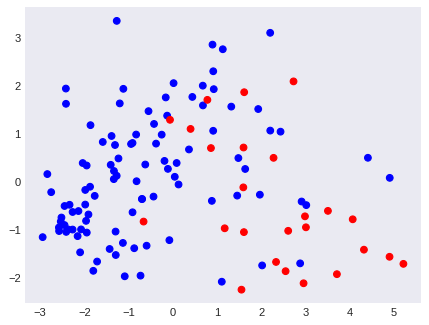

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
plot = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="bwr_r")
#plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.savefig("orig_data.png")
plt.show()


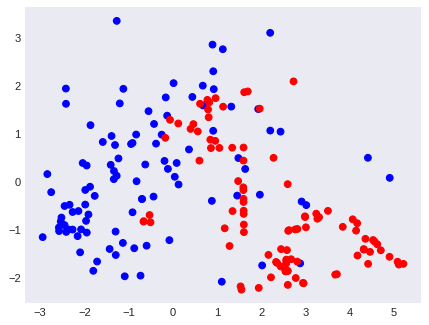

In [ ]:
over = SMOTE()  # sampling_strategy=0.1)
under = RandomUnderSampler()  # sampling_strategy=0.5)

X_train_smote, y_train_smote = over.fit_resample(X_train_pca, y_train)
plot = plt.scatter(X_train_smote[:,0], X_train_smote[:,1], c=y_train_smote, cmap="bwr_r")
#plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.savefig("smote_data.png")
plt.show()
